<a href="https://colab.research.google.com/github/Kishanditto/CODSOFT/blob/main/MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# MOVIE RATING PREDICTION WITH PYTHON

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately

```



In [1]:
#Import Libraries:
#Start by importing the necessary libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Load Data:
# Load the data from the provided files.
movies = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'], encoding='latin-1')
ratings = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='latin-1')
users = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'])



In [3]:
# Merge Data:
# Merge the movies and ratings data based on the MovieID.

movie_ratings = pd.merge(movies, ratings, on='MovieID')
# Merge data
ratings_with_users = pd.merge(ratings, users, on='UserID')


In [4]:
#Feature Engineering:
# Extract relevant features like genre, director, and actors from the movie titles. You might need to preprocess the text data for this.

# Encode categorical features from users data
encoded_ratings = pd.get_dummies(ratings_with_users, columns=['Gender', 'Occupation'])



In [5]:
# Data Preprocessing:
encoded_ratings.head()

,UserID,MovieID,Rating,Timestamp,Age,ZipCode,Gender_F,Gender_M,Occupation_0,Occupation_1,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,1,1193,5,978300760,1,48067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,1,48067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,914,3,978301968,1,48067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3408,4,978300275,1,48067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,1,48067,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
encoded_ratings.tail()

,UserID,MovieID,Rating,Timestamp,Age,ZipCode,Gender_F,Gender_M,Occupation_0,Occupation_1,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
1000204,6040,1091,1,956716541,25,11106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,956704887,25,11106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,6040,562,5,956704746,25,11106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,4,956715648,25,11106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000208,6040,1097,4,956715569,25,11106,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
encoded_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
Timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09
Age,1000209.0,2.973831e+01,1.175198e+01,1.0,25.0,25.0,35.0,5.600000e+01
Gender_F,1000209.0,2.463885e-01,4.309076e-01,0.0,0.0,0.0,0.0,1.000000e+00
Gender_M,1000209.0,7.536115e-01,4.309076e-01,0.0,1.0,1.0,1.0,1.000000e+00
Occupation_0,1000209.0,1.304717e-01,3.368219e-01,0.0,0.0,0.0,0.0,1.000000e+00
Occupation_1,1000209.0,8.533317e-02,2.793770e-01,0.0,0.0,0.0,0.0,1.000000e+00
Occupation_2,1000209.0,5.005754e-02,2.180638e-01,0.0,0.0,0.0,0.0,1.000000e+00


In [8]:
encoded_ratings.isnull().sum()

UserID           0
MovieID          0
Rating           0
Timestamp        0
Age              0
ZipCode          0
Gender_F         0
Gender_M         0
Occupation_0     0
Occupation_1     0
Occupation_2     0
Occupation_3     0
Occupation_4     0
Occupation_5     0
Occupation_6     0
Occupation_7     0
Occupation_8     0
Occupation_9     0
Occupation_10    0
Occupation_11    0
Occupation_12    0
Occupation_13    0
Occupation_14    0
Occupation_15    0
Occupation_16    0
Occupation_17    0
Occupation_18    0
Occupation_19    0
Occupation_20    0
dtype: int64

#### Histogram of Ratings:

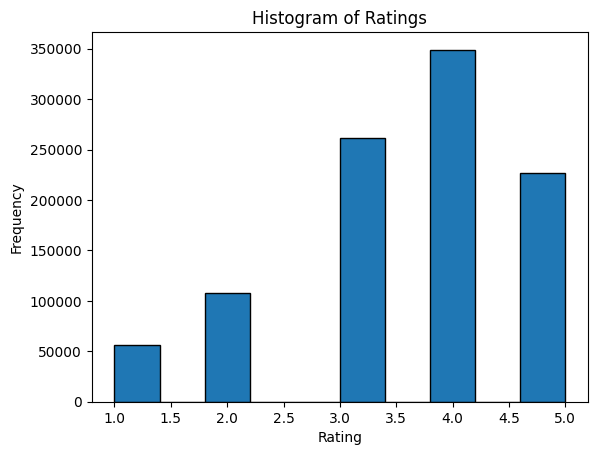

In [9]:
import matplotlib.pyplot as plt

# Plot a histogram of ratings
plt.hist(ratings['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()


Box Plot of Ratings by Gender:


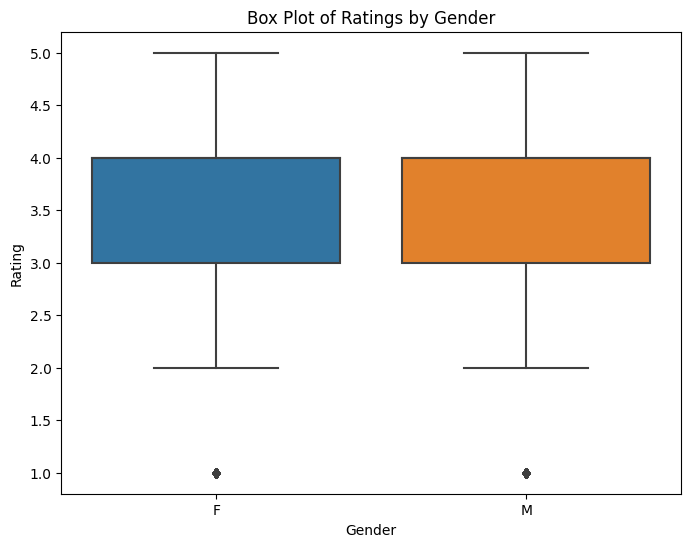

In [11]:
import seaborn as sns

# Merge users and ratings data
ratings_with_gender = pd.merge(ratings, users[['UserID', 'Gender']], on='UserID')

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Rating', data=ratings_with_gender)
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings by Gender')
plt.show()


In [12]:
# Separate features and target
X = encoded_ratings.drop(['Rating', 'Timestamp'], axis=1)
y = encoded_ratings['Rating']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Drop non-numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

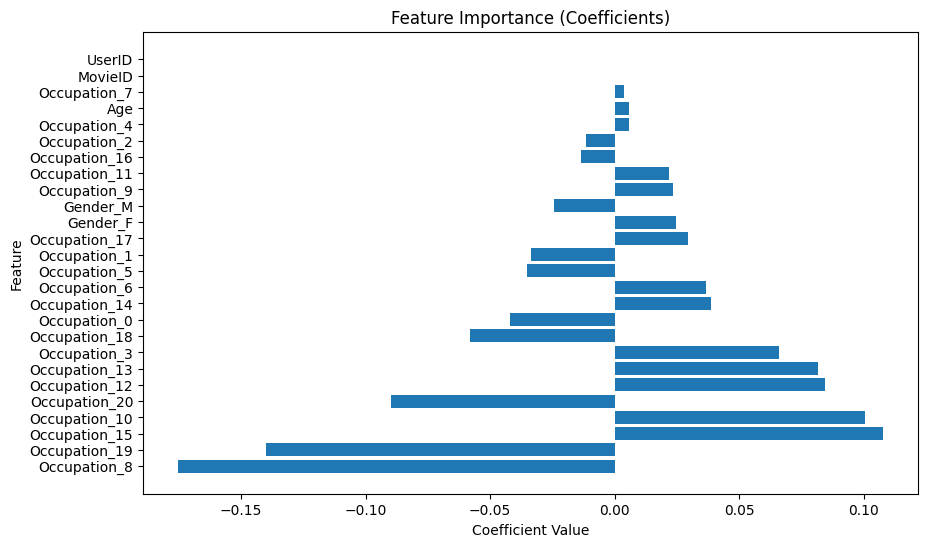

In [15]:
# Assuming you've already trained the model and calculated coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})

# Sort coefficients by absolute value for better visualization
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients)')
plt.show()


In [16]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.2423862227951492
